In [2]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Input
windSpeed    = ctrl.Antecedent(np.linspace(0.7, 3.1, 100), 'WS')
temperatureC = ctrl.Antecedent(np.linspace(20.4, 41.2, 100), 'TP')

# Output 
rainfall = ctrl.Consequent(np.linspace(0.2, 9.1, 100), 'RF')

# Membership functions
windSpeed['VL'] = fuzz.trimf(windSpeed.universe,[0.70, 0.70, 1.05])
windSpeed['L']  = fuzz.trimf(windSpeed.universe,[0.80, 1.10, 1.30])
windSpeed['N']  = fuzz.trimf(windSpeed.universe,[1.10, 1.35, 1.57])
windSpeed['H']  = fuzz.trimf(windSpeed.universe,[1.37, 1.58, 1.80])
windSpeed['VH'] = fuzz.trimf(windSpeed.universe,[1.59, 1.90, 3.10])

temperatureC['VL'] = fuzz.trimf(temperatureC.universe,[20.4, 21.7, 23.1])
temperatureC['L']  = fuzz.trimf(temperatureC.universe,[22.5, 26.2, 28.1])
temperatureC['N']  = fuzz.trimf(temperatureC.universe,[27.9, 30.8, 33.7])
temperatureC['H']  = fuzz.trimf(temperatureC.universe,[31.3, 34.6, 37.5])
temperatureC['VH'] = fuzz.trimf(temperatureC.universe,[35.8, 38.7, 41.2])

rainfall['VL'] = fuzz.trimf(rainfall.universe,[0.20, 0.68, 1.32])
rainfall['L']  = fuzz.trimf(rainfall.universe,[0.95, 2.53, 4.31])
rainfall['N']  = fuzz.trimf(rainfall.universe,[2.74, 4.67, 5.80])
rainfall['H']  = fuzz.trimf(rainfall.universe,[4.76, 5.93, 6.94])
rainfall['VH'] = fuzz.trimf(rainfall.universe,[6.13, 8.01, 9.10])

# Rules
rule = []

rule.append(ctrl.Rule(windSpeed['VL'] & temperatureC['VL'], rainfall['N']))
rule.append(ctrl.Rule(windSpeed['VL'] & temperatureC['L'] , rainfall['L']))
rule.append(ctrl.Rule(windSpeed['VL'] & temperatureC['N'] , rainfall['VL']))
rule.append(ctrl.Rule(windSpeed['VL'] & temperatureC['H'] , rainfall['VL']))
rule.append(ctrl.Rule(windSpeed['VL'] & temperatureC['VH'], rainfall['VL']))

rule.append(ctrl.Rule(windSpeed['L'] & temperatureC['VL'], rainfall['N']))
rule.append(ctrl.Rule(windSpeed['L'] & temperatureC['L'] , rainfall['L']))
rule.append(ctrl.Rule(windSpeed['L'] & temperatureC['N'] , rainfall['L']))
rule.append(ctrl.Rule(windSpeed['L'] & temperatureC['H'] , rainfall['VL']))
rule.append(ctrl.Rule(windSpeed['L'] & temperatureC['VH'], rainfall['VL']))

rule.append(ctrl.Rule(windSpeed['N'] & temperatureC['VL'], rainfall['H']))
rule.append(ctrl.Rule(windSpeed['N'] & temperatureC['L'] , rainfall['N']))

rule.append(ctrl.Rule(windSpeed['H'] & temperatureC['VL'], rainfall['H']))
rule.append(ctrl.Rule(windSpeed['H'] & temperatureC['L'] , rainfall['H']))
rule.append(ctrl.Rule(windSpeed['H'] & temperatureC['N'] , rainfall['N']))
rule.append(ctrl.Rule(windSpeed['H'] & temperatureC['H'] , rainfall['L']))
rule.append(ctrl.Rule(windSpeed['H'] & temperatureC['VH'], rainfall['L']))

rule.append(ctrl.Rule(windSpeed['VH'] & temperatureC['VL'], rainfall['VH']))
rule.append(ctrl.Rule(windSpeed['VH'] & temperatureC['L'] , rainfall['H']))
rule.append(ctrl.Rule(windSpeed['VH'] & temperatureC['N'] , rainfall['H']))
rule.append(ctrl.Rule(windSpeed['VH'] & temperatureC['H'] , rainfall['N']))
rule.append(ctrl.Rule(windSpeed['VH'] & temperatureC['VH'], rainfall['N']))


In [5]:
#Control system
rainfall_control = ctrl.ControlSystem(rule)
rainfall_simulation = ctrl.ControlSystemSimulation(rainfall_control)

/home/tinozg/anaconda3/envs/AI/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


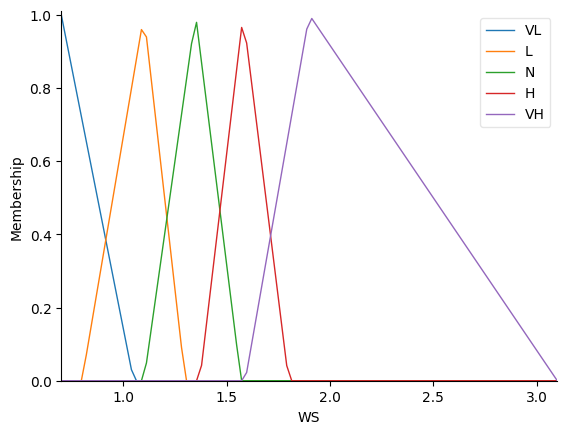

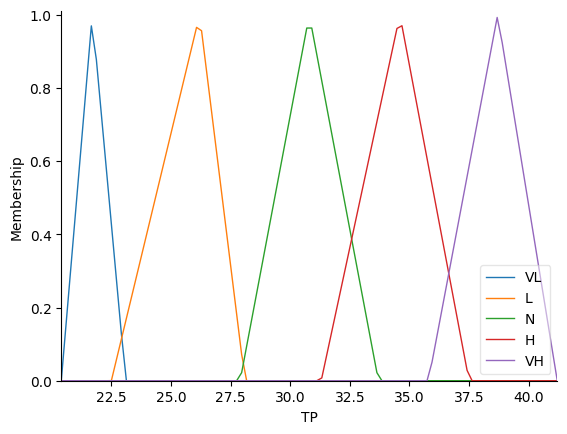

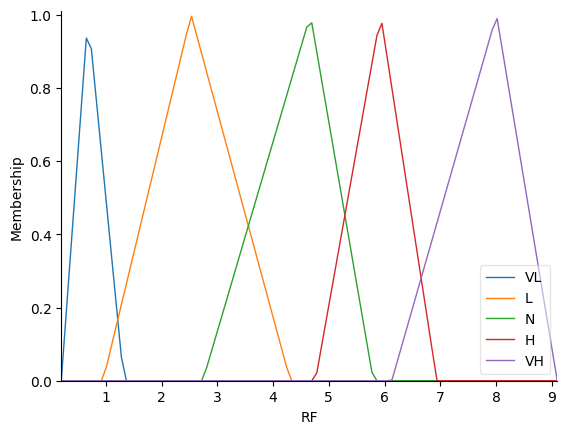

In [6]:
windSpeed.view()
temperatureC.view()
rainfall.view()

5.8717456578676535


/home/tinozg/anaconda3/envs/AI/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


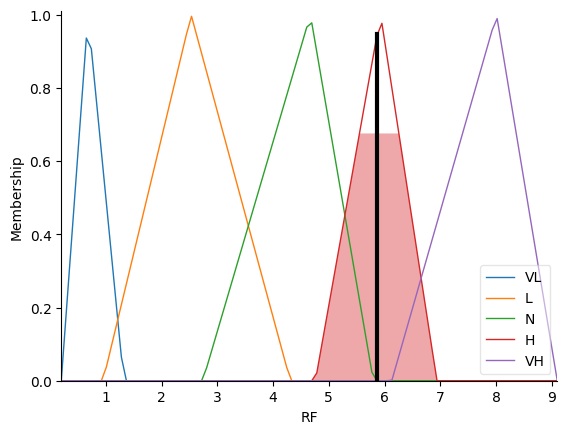

In [19]:
# Compute
rainfall_simulation.input['WS'] = 2.0
rainfall_simulation.input['TP'] = 25.0

rainfall_simulation.compute()

print(rainfall_simulation.output['RF'])

# Rainfall
rainfall.view(sim = rainfall_simulation)